In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', 300)
%matplotlib inline

plt.style.use('seaborn')

In [ ]:
#Check filepath for fetel health csv
import os
os.path.isfile('/content/drive/MyDrive/fetal_health.txt')

True

In [ ]:
#Read in fetal health Csv
df = pd.read_csv('/content/drive/MyDrive/fetal_health.txt')


In [ ]:
#Check columns and rows
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Data Cleaning

- The Dataframe had no missing values, 22 columns and 2126 rows and all the datatypes where float integers.

In [ ]:
#Check for null Values
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
#Check Shape of dataframe
df.shape

(2126, 22)

In [ ]:
#Data types
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

The dataframe had no missing values, and was 22 columns with 2126 rows.  The data type for each column was a float. 

In [ ]:
#change any value of the target value above one to two, creating two target classes instead of three classes. 
df.fetal_health = np.where(df.fetal_health > 1.0, 2.0, df.fetal_health)

In [ ]:
df.fetal_health.value_counts()

1.0    1655
2.0     471
Name: fetal_health, dtype: int64

We decided to create a binary targert where the fetal health was either normal (1) or in distress (2).

## EDA

In this stage of our analysis we wanted to take an indepth look at the data.  We examined the target classes and the relationships of the features with both the target class and themselves.  

In [ ]:
# value counts for having heart disease or not
df['fetal_health'].value_counts()

1.0    1655
2.0     471
Name: fetal_health, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


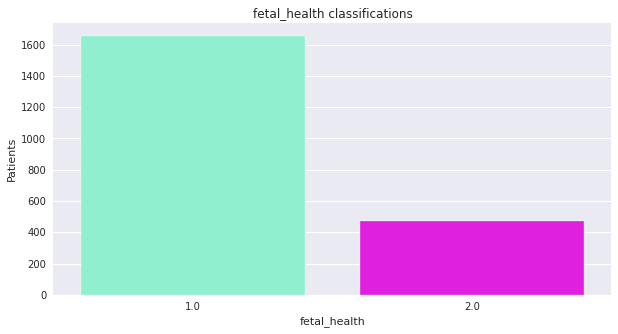

In [ ]:
# Check the Distribution of target data
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['fetal_health'], alpha = 1, palette= ['aquamarine','magenta','mediumblue'])
plt.title('fetal_health classifications')
plt.ylabel('Patients')

plt.show()

- Here we created a visualization showing the distribution of samples that where classified as either healthy (1) or distressed (2).  There is a significant difference in the two sample sizes.  We will need to consider class imbalance in our modeling hyperpareters.  

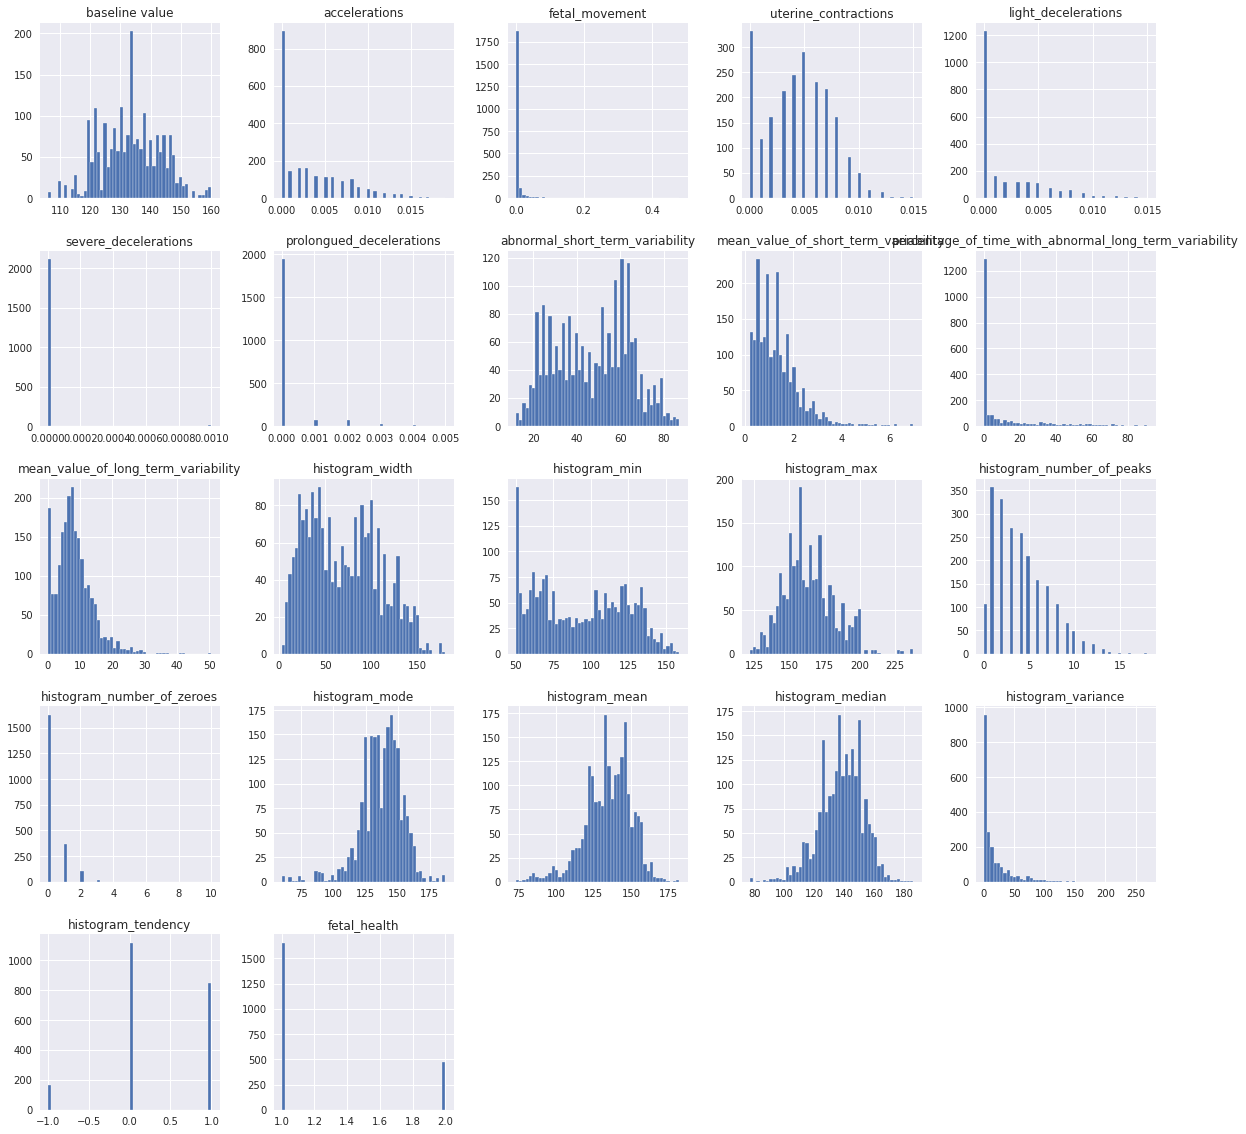

In [ ]:
# Histogram of all featrues
df.hist(bins=50, figsize=(20,20))
plt.show()

- We created a histogram of each feature to visualize the distribution of of each feature.  Certain features such as acceleration, light decelerations and fetal movement seem ideal for binning, while catagorical features like prolonged deceleration, severe deceleration and histogram tendancy seemed ideal for dummy catagories.  

In [ ]:
#Check the statistical data of the features
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.221543
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.415383
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,2.000000


In [ ]:
#check feature corrolation 
df.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.251875
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,-0.142363,0.298631,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.394760
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,0.011047,0.162790,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.060974
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,-0.066058,0.142541,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.263639
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,-0.242932,0.520467,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,-0.032889
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,-0.037667,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.087967
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,-0.226514,0.265391,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.340554
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.493391
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.207717
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.489400


In [ ]:
#create dataframe of predictor variables
fetal_health_pred = df.drop('fetal_health', axis =1)

In [ ]:
#plot a scatter matrix of predictor variable relationships
pd.plotting.scatter_matrix(fetal_health_pred,figsize= (50,50));
plt.show()

Output hidden; open in https://colab.research.google.com to view.

- In this section of the EDA we checked individual features and their interactions with the target and other features.  We were looking any irregularities, outliers and distributions, that we could use to create new features for better classification.  

In [ ]:
#check value counts of uterine_contractions
df.uterine_contractions.value_counts()

0.000    332
0.005    290
0.004    244
0.006    231
0.007    216
0.003    212
0.008    160
0.002    160
0.001    118
0.009     82
0.010     49
0.011     16
0.012     11
0.013      2
0.014      2
0.015      1
Name: uterine_contractions, dtype: int64

In [ ]:
#Check value counts of abnormal short term varitability
df.abnormal_short_term_variability.value_counts()

60.0    62
58.0    61
65.0    60
63.0    58
64.0    58
        ..
14.0     4
86.0     4
12.0     2
82.0     2
87.0     1
Name: abnormal_short_term_variability, Length: 75, dtype: int64

- We wanted to take a closer look at the histogram features.  These features where values taken from the histogogram of the baseline fetal heart rate and the frequency of changes over time.  These distribution of FHR changers over time are the same metrics that physicians use for their visual analysis of the CTG.  Our initial thought was that these histogram values would be the key variables in determining fetal health class. 

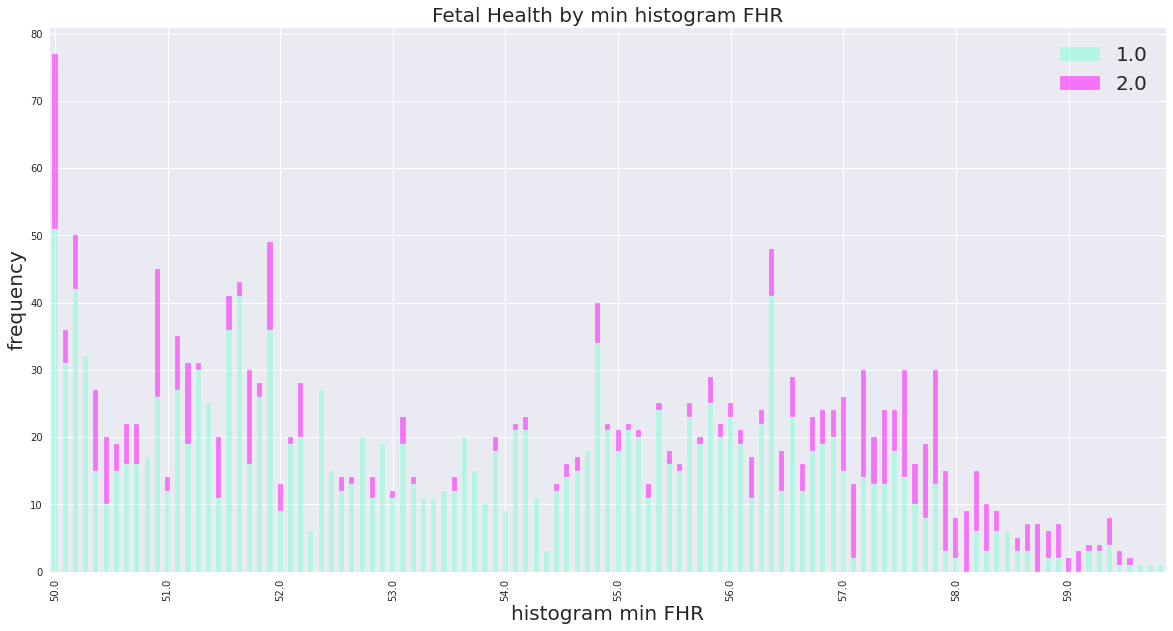

In [ ]:
#Histogram showing the histogram distrubition values of minimum FHR by the Classes
histogram_min = df.groupby(['histogram_min','fetal_health']).histogram_min.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram min FHR',fontsize=20)
pl.locator_params(axis='x',nbins=10)
pl.legend(fontsize=20)
pl.set_ylabel('frequency',fontsize=20)
pl.set_title('Fetal Health by min histogram FHR',fontsize=20)
plt.show()

In [ ]:
df.severe_decelerations.value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

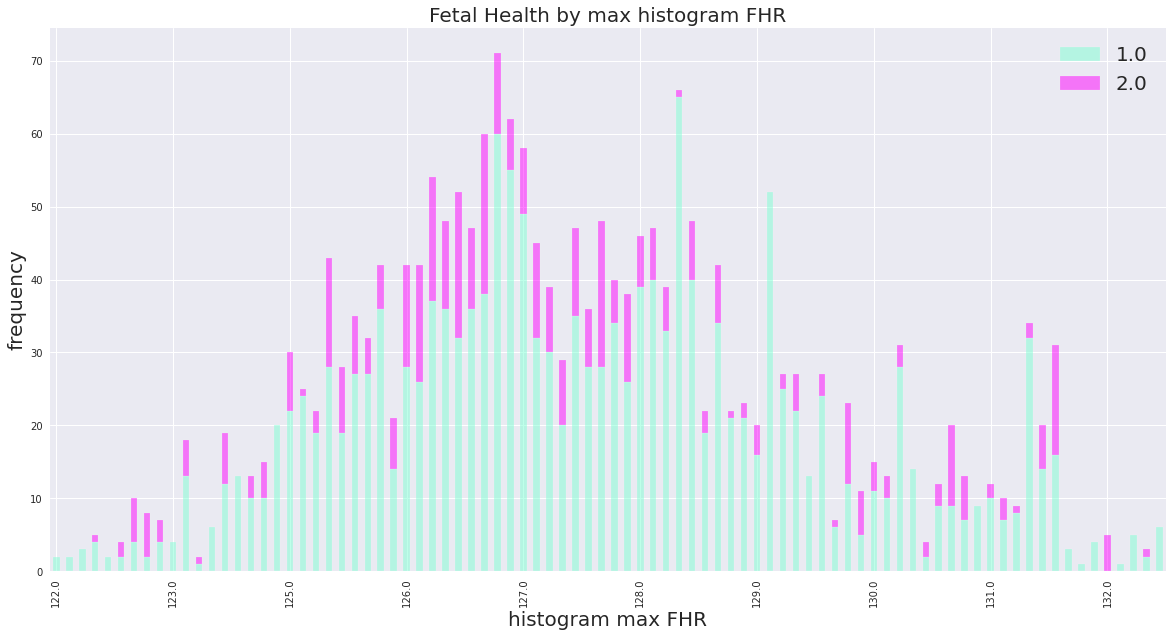

In [ ]:
# #Histogram showing the histogram distribution values of maximum FHR by the Classes
histogram_min = df.groupby(['histogram_max','fetal_health']).histogram_max.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram max FHR',fontsize=20)
pl.locator_params(axis='x',nbins=10)
pl.legend(fontsize=20)
pl.set_ylabel('frequency',fontsize=20)
pl.set_title('Fetal Health by max histogram FHR',fontsize=20)
plt.show()

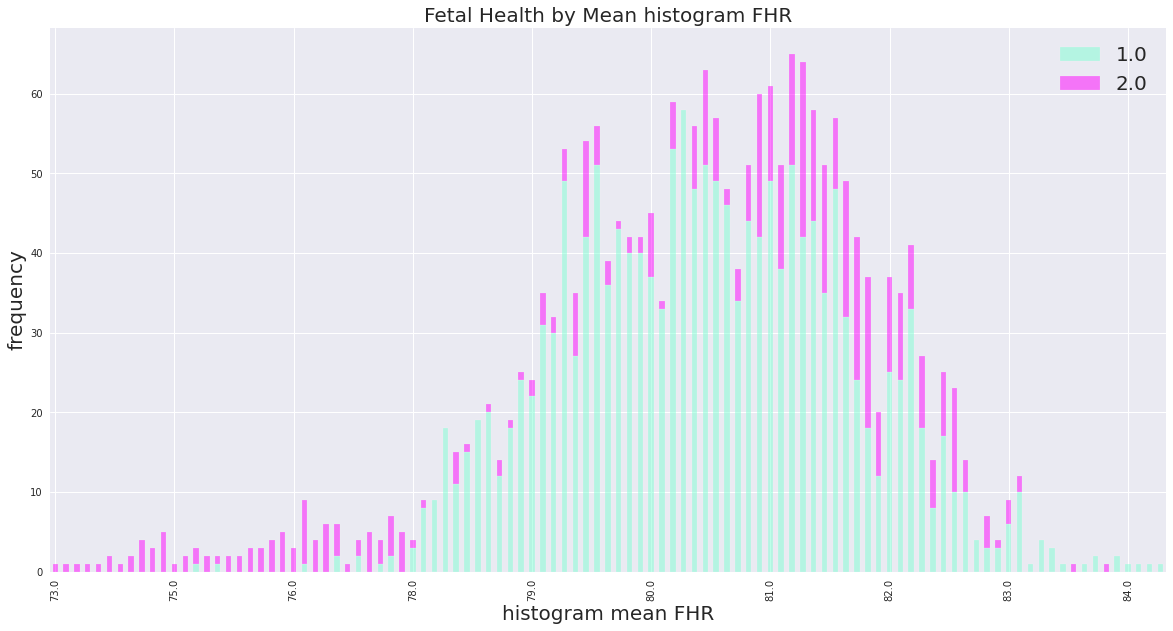

In [ ]:
# #Histogram showing the histogram distribution values of average FHR by the Classes
histogram_min = df.groupby(['histogram_mean','fetal_health']).histogram_mean.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       color = ['aquamarine','magenta'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram mean FHR',fontsize=20)
pl.locator_params(axis='x',nbins=10)
pl.legend(fontsize=20)
pl.set_ylabel('frequency',fontsize=20)
pl.set_title('Fetal Health by Mean histogram FHR',fontsize=20)
plt.show()

- In the visualizations above you can see the distribution of the two classes for the feature values.  In the histogram mean, you can see a clear section of the distribution only covered by our distressed class.  This became a target for one of our engineered features. 

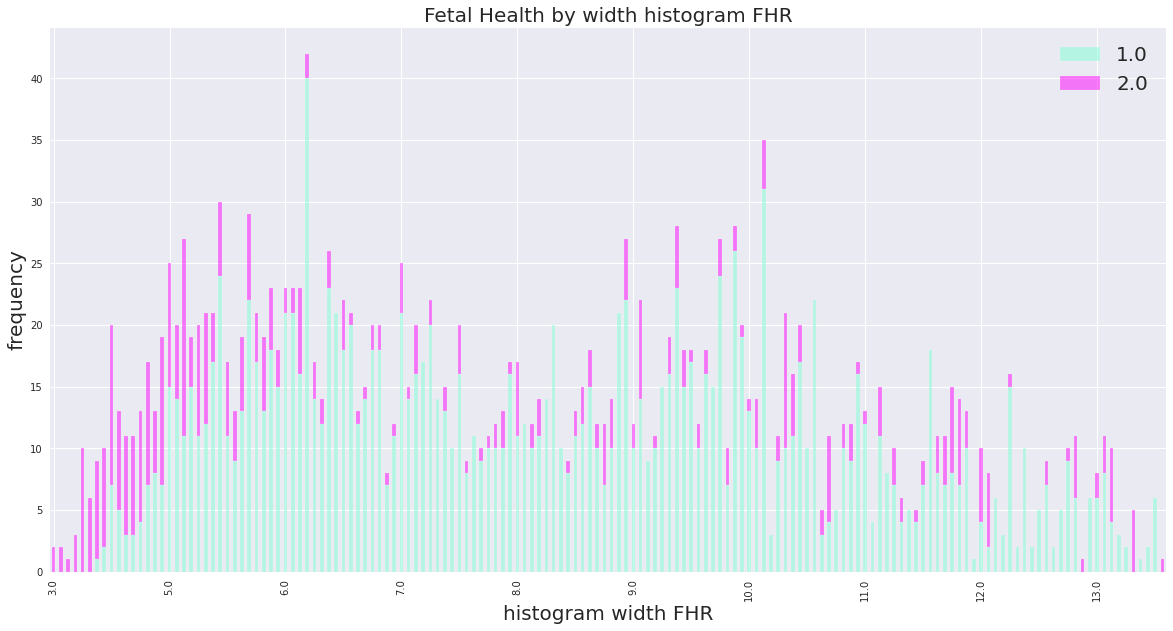

In [ ]:
# #Histogram showing the histogram mean values of average FHR by the Classes
histogram_min = df.groupby(['histogram_width','fetal_health']).histogram_width.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       color = ['aquamarine','magenta'],
                       alpha = .5, figsize = (20,10))
pl.set_xlabel('histogram width FHR',fontsize=20)
pl.locator_params(axis='x',nbins=10)
pl.legend(fontsize=20)
pl.set_ylabel('frequency',fontsize=20)
pl.set_title('Fetal Health by width histogram FHR',fontsize=20)
plt.show()

- Next we wanted to take a look at severe decelerations.  We knew that any major changes of FHR when visually monitered results in immediate surgical intervention.  The severe deceleration feature was almost synonymous with the distressed class, however of the 2126 instances in the dataset, there are only 7 instances of severe deceleration.  We suspect this is a key feature in classification, but there may not be enough data here to train the model.  Were to to preform another analysis creating multiple classes of fetal distress, we hypothesis these extreme changes in fetal heart rate will play a role in classifying pathological fetel health.

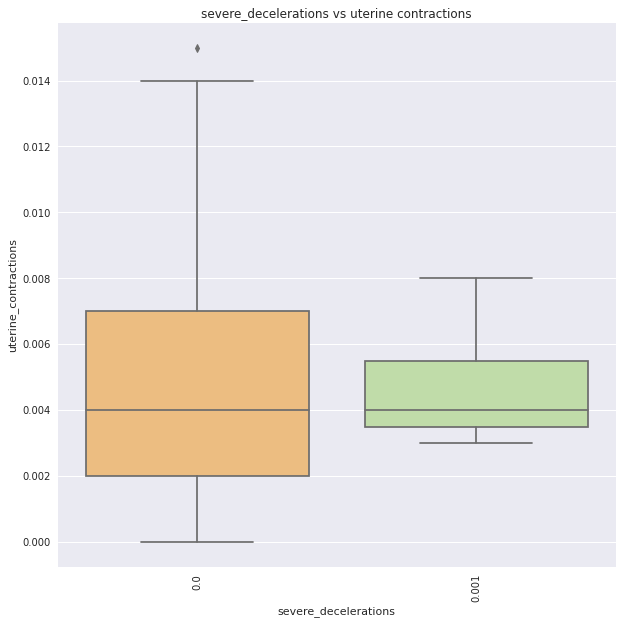

In [ ]:
# Boxplot of uterine contractions over per sever deceleration of FHR
plt.figure(figsize = (10,10))
sns.boxplot(x = 'severe_decelerations', 
            y ='uterine_contractions',
            data = df, 
            palette = 'Spectral').set_title('severe_decelerations vs uterine contractions')
plt.xticks(rotation='vertical')
plt.show()

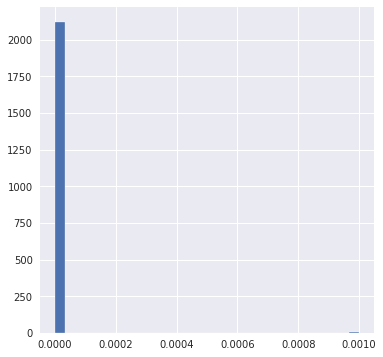

In [ ]:
#Histogram showing the distribution of severe deceleration in the dataset
df.severe_decelerations.hist(bins=30,figsize=(6,6))

In [ ]:
#value count of the severe decelerations
df.severe_decelerations.value_counts()

0.000    2119
0.001       7
Name: severe_decelerations, dtype: int64

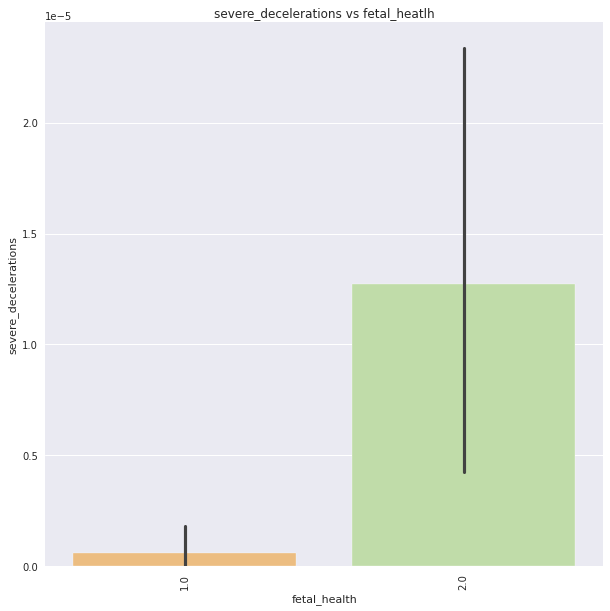

In [ ]:
#boxplot of fetal health vs sever deceleration
plt.figure(figsize = (10,10))
sns.barplot(x = 'fetal_health', 
            y ='severe_decelerations',
            data = df, 
            palette = 'Spectral').set_title('severe_decelerations vs fetal_heatlh')
plt.xticks(rotation='vertical')
plt.show()

### Baseline models

- In this step of our EDA we preformed four baseline models to guage how the existing data features preformed on their own.  A KNN classifier yeilded an accuracy of .92, a recall of .96 and a f1 score of .95.  A logistic regression classifier yeilded an accuracy of .89, a recall of .95 and a f1 score of .93.  A decision tree yeilded an accuracy of .92, a recall of .94 and a f1 score of .95.  A random forest classifier yeilded an accuracy of .9, a recall of .99 and an f1 score of .94.  Each of these baseline models preformed very well at predicting the target classes despite the apperent class imbalance.  Our further modeling will focus on identifying which features play a key roll in fetal health classification, and how we can fine tune the models to improve upon the models already good metric scores.

In [ ]:
#Train test split to create basline models for the unaltered dataset.
X = df.drop('fetal_health',axis=1)
y= df.fetal_health

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
#an evaluation metric function to reduce clean up the code
def evaluation(y_test, y_pred):
    print('Accuracy: '  + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))

In [ ]:
#Baseline knn classifer model using 1 nearest neighbor hyperparameter
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# predicting on the test set and printing evaluation metrics of the baseline knn model
y_pred = knn.predict(X_test)
evaluation(y_test,y_pred)

Accuracy: 0.9210526315789473
Recall: 0.9682151589242054
F1 Score: 0.9496402877697842
Precision: 0.9317647058823529


In [ ]:
# predicting on the test set and printing evaluation metrics of the baseline k model
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# predicting accuracy,recall,f1 and precision with the baseline knn
y_pred = lr.predict(X_test)
evaluation(y_test, y_pred)

Accuracy: 0.8703007518796992
Recall: 0.9535452322738386
F1 Score: 0.9187279151943463
Precision: 0.8863636363636364


In [57]:
lg_acc=87.03


In [ ]:
#print the feature coefitiants 
print(lr.coef_)

[[ 6.77990434e-02 -2.04030299e-03  1.35984889e-02 -2.74872971e-03
  -1.16173045e-03 -2.12765818e-06  4.26541194e-04  5.79296811e-02
  -3.64371051e-01  5.15857099e-02  4.29408568e-02 -9.47704233e-03
   7.69633292e-03 -1.78070940e-03  1.44898088e-01  9.95443890e-02
   3.77519445e-03 -2.09579226e-03 -1.09141137e-01  2.24267187e-02
   1.32977182e-01]]


In [ ]:
#create a table of coefficients matched with their coresponding feature
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())
coef_table

,0,Coefs
0,baseline value,0.067799
1,accelerations,-0.002040
2,fetal_movement,0.013598
3,uterine_contractions,-0.002749
4,light_decelerations,-0.001162
5,severe_decelerations,-0.000002
6,prolongued_decelerations,0.000427
7,abnormal_short_term_variability,0.057930
8,mean_value_of_short_term_variability,-0.364371
9,percentage_of_time_with_abnormal_long_term_var...,0.051586


In [ ]:
#Baseline decision tree with evaluation metrics for predictions on the test set
tree = DecisionTreeClassifier()

tree = tree.fit(X_train,y_train)

y_pred = tree.predict(X_test)

evaluation(y_test, y_pred)

Accuracy: 0.924812030075188
Recall: 0.9486552567237164
F1 Score: 0.9509803921568628
Precision: 0.9533169533169533


In [58]:
dt_acc=95.33


In [ ]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",tree.feature_importances_.transpose())
coef_table

,0,Coefs
0,baseline value,0.040631
1,accelerations,0.034347
2,fetal_movement,0.012751
3,uterine_contractions,0.030813
4,light_decelerations,0.003571
5,severe_decelerations,0.000000
6,prolongued_decelerations,0.031040
7,abnormal_short_term_variability,0.340593
8,mean_value_of_short_term_variability,0.118266
9,percentage_of_time_with_abnormal_long_term_var...,0.045327


In [ ]:
#baseline random forest with evaluation metrics for predictions on the test set
rfc = RandomForestClassifier(random_state =1, n_estimators= 50, max_depth = 3, n_jobs =-1,verbose=1)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

evaluation(y_test, y_pred)

Accuracy: 0.9097744360902256
Recall: 0.9902200488997555
F1 Score: 0.944055944055944
Precision: 0.9020044543429844


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


In [60]:
rf_acc=90.20

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC()

In [ ]:
model.fit(X_train,y_train)

SVC()

In [ ]:
predict_train = model.predict(X_train)
predict_train

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.8795483061480552


In [59]:
svm_acc=87.95

In [ ]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",rfc.feature_importances_.transpose())
coef_table

,0,Coefs
0,baseline value,0.015332
1,accelerations,0.109405
2,fetal_movement,0.006348
3,uterine_contractions,0.030338
4,light_decelerations,0.002197
5,severe_decelerations,0.000000
6,prolongued_decelerations,0.059527
7,abnormal_short_term_variability,0.190538
8,mean_value_of_short_term_variability,0.182492
9,percentage_of_time_with_abnormal_long_term_var...,0.101556


Fore these baseline models, we also checked the coefficient values for the the features in our logistic regression, decision tree and random forest mode.  

#Random Forest in comparison with Logistic Regression 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-62-174bf2810ee2>:9: UserWarning: Attempting to set identical bottom == top == 90 results in singular transformations; automatically expanding.
  ax.set_ylim(90,90)


(85.5, 94.5)

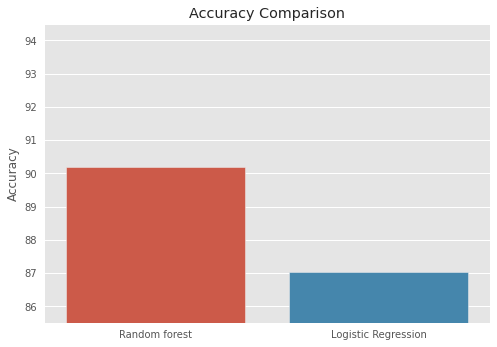

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
ac = [rf_acc,lg_acc]
plt.style.use('ggplot')
x = ['Random forest', 'Logistic Regression']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(90,90)

# Logistic Regression in comparison with Decision Trees

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-65-8fd14871b2fa>:9: UserWarning: Attempting to set identical bottom == top == 90 results in singular transformations; automatically expanding.
  ax.set_ylim(90,90)


(85.5, 94.5)

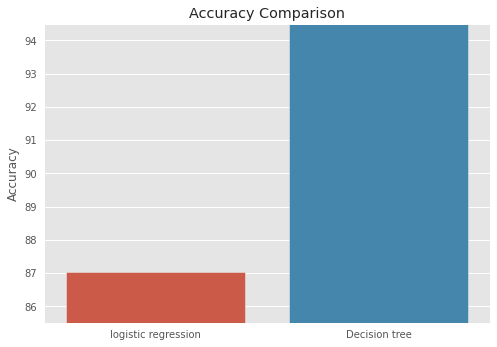

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
ac = [lg_acc,dt_acc]
plt.style.use('ggplot')
x = ['logistic regression', 'Decision tree']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(90,90)

#Decision Trees in comparison with Support vector machine

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-66-21b9f0a15108>:9: UserWarning: Attempting to set identical bottom == top == 90 results in singular transformations; automatically expanding.
  ax.set_ylim(90,90)


(85.5, 94.5)

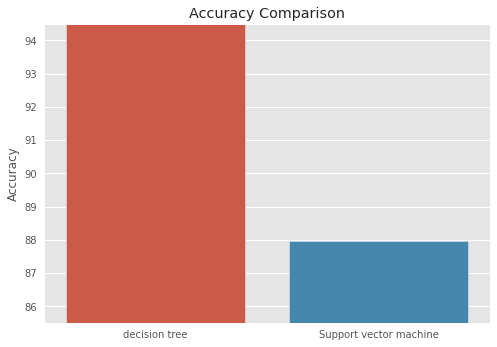

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
ac = [dt_acc,svm_acc]
plt.style.use('ggplot')
x = ['decision tree', 'Support vector machine']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(90,90)

#Support vector  in comparison with random forest


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-67-292290fc72d5>:9: UserWarning: Attempting to set identical bottom == top == 90 results in singular transformations; automatically expanding.
  ax.set_ylim(90,90)


(85.5, 94.5)

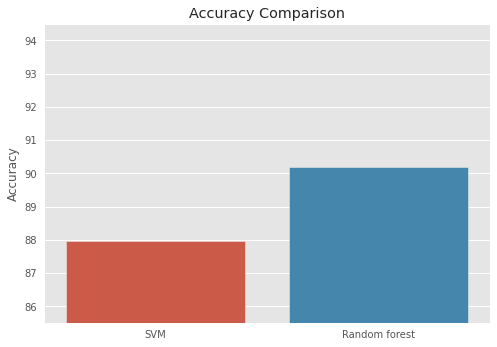

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
ac = [svm_acc,rf_acc]
plt.style.use('ggplot')
x = ['SVM', 'Random forest']
ax = sns.barplot(x, ac)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(90,90)